In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import product, repeat
import os 
import json

import matplotlib as mpl
import string

mpl.rcParams['mathtext.fontset'] = 'cm'
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
# params = {
#         # 'text.usetex' : True,
#           'font.size' : 11,
#           'font.family' : 'lmodern',
#         #   'text.latex.unicode': True,
#           }
# plt.rcParams.update(params) 

def generate_file_names(arrays):

    files = []
    lst = []
    for i in product(*arrays):
        lst.append(list(i))

    for l in lst:

        switch, degr,learn_rew, q, p, h, tb, db, tpb, dec_temp,  rew, utility, config, infer_h, infer_dec, task,wi = l
        infer_both = infer_h and infer_dec

        prefix = task
        run_name = prefix+"hier_switch"+str(int(switch)) +"_degr"+str(int(degr)) +"_p"+str(p)+ "_learn_rew"+str(int(learn_rew))+\
                "_q"+str(q) + "_h"+str(h)  + "_" + str(tpb) +  "_" + str(tb) + str(db) + '_dec' + str(dec_temp) + \
                '_rew' + str(rew) + '_u' + '-'.join([str(u) for u in utility]) + '_' + config + '_rep' + str(wi) + "_extinguish.json"

        inference_file = 'ryzen/inferences/31/inf_'
        inference_file += str(int(infer_h)) + str(int(infer_dec)) + '_' + run_name[:-5] + '_rep' + str(wi) + '.json'
        inference_file = os.path.join(os.getcwd(), inference_file)

        files.append([inference_file, l])

    return files




def load_df(files,nsamples=5000):
    dfs = []
    for file in files: 
        fname = file[0]
        params = file[1]
        switch, degr,learn_rew,\
        q, p, h, tb, db, tpb, dec_temp,\
        rew, utility, config, infer_h, infer_dec, task, rep = params
        try:
            data = open(fname)
            data = json.load(data)
            file_missing = False
        except:
            file_missing = True
            print('file is missing')
        
        if not file_missing:
            # print(data.keys())
            concentration = data['concentration_dec_temp'][0]
            rate = 1/data['rate_dec_temp'][0]
            # print(rate)
            alpha_h = data['alpha_h'][0]
            beta_h = data['beta_h'][0]
            h_mean = np.repeat(alpha_h/(alpha_h + beta_h), nsamples)
            dec_mean = np.repeat(concentration*rate, nsamples)
            h_samples = np.log10(np.random.beta(alpha_h, beta_h, size=nsamples))
            h_samples = np.random.beta(alpha_h, beta_h, size=nsamples)
            dec_samples = np.random.gamma(concentration, rate, size=nsamples)
            if h == 1:
                word_tag = 'strong'
            elif h == 10:
                word_tag = 'average'
            elif h==100:
                word_tag = 'weak'
            # h = np.repeat(np.log10(1/h),nsamples)
            h = np.repeat(1/h,nsamples)

            # h = np.repeat(word_tag,nsamples)

            dec_temp = np.repeat(dec_temp, nsamples)
            rep = np.repeat(rep, nsamples)

            if task == 'multiple_':
                task = 0
            else:
                task = 1
            task = np.repeat(task, nsamples)
            ns = np.arange(nsamples)
            df = {'h': h,'dec_temp': dec_temp, 'task':  task, 'h_samples':h_samples, 'dec_samples':dec_samples, 'h_mean':h_mean, 'dec_mean':dec_mean,'ns':ns}
            dfs.append(pd.DataFrame.from_dict(df))

    dfs = pd.concat(dfs)
    return dfs




In [18]:


h =  [1,10,100]
cue_ambiguity = [0.85]                       
context_trans_prob = [0.95]
cue_switch = [False]
reward_naive = [True]
training_blocks = [3]
degradation_blocks=[1]
degradation = [True]
trials_per_block=[70]
dec_temps = [2,4]
rews = [0]
utility = [[1,9,90]]
conf = ['original']
repeats = np.arange(10).tolist()

infer_h = [True]
infer_dec = [True]
task = ['']

arrays1 = [cue_switch, degradation, reward_naive, context_trans_prob, cue_ambiguity,h,\
          training_blocks, degradation_blocks, trials_per_block,dec_temps,rews, utility,\
          conf, infer_h, infer_dec, task,repeats]



h =  [1,10,100]
cue_ambiguity = [0.8]                       
context_trans_prob = [0.85]
cue_switch = [False]
reward_naive = [True]
training_blocks = [3]
degradation_blocks=[1]
degradation = [True]
trials_per_block=[70]
dec_temps = [2,4]
rews = [0]
utility = [[1,9,90]]
conf = ['shuffled']
repeats = np.arange(10).tolist()

infer_h = [True]
infer_dec = [True]
task = ['multiple_']

arrays2 = [cue_switch, degradation, reward_naive, context_trans_prob, cue_ambiguity,h,\
          training_blocks, degradation_blocks, trials_per_block,dec_temps,rews, utility,\
          conf, infer_h, infer_dec, task,repeats]

files_to_load = []

files_to_load += generate_file_names(arrays1)
files_to_load += generate_file_names(arrays2)

df = load_df(files_to_load)
df.head()

file is missing
file is missing
file is missing
file is missing
file is missing
file is missing
file is missing
file is missing
file is missing


,h,dec_temp,task,h_samples,dec_samples,h_mean,dec_mean,ns
0,1.0,2,1,0.874705,2.704717,0.848021,1.833239,0
1,1.0,2,1,0.724569,1.808191,0.848021,1.833239,1
2,1.0,2,1,0.658412,1.947879,0.848021,1.833239,2
3,1.0,2,1,0.954843,1.268392,0.848021,1.833239,3
4,1.0,2,1,0.767628,1.518599,0.848021,1.833239,4


/tmp/ipykernel_251641/2079536208.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('hvsp_fits.png',bbox_inch = 'tight', dpi=300)


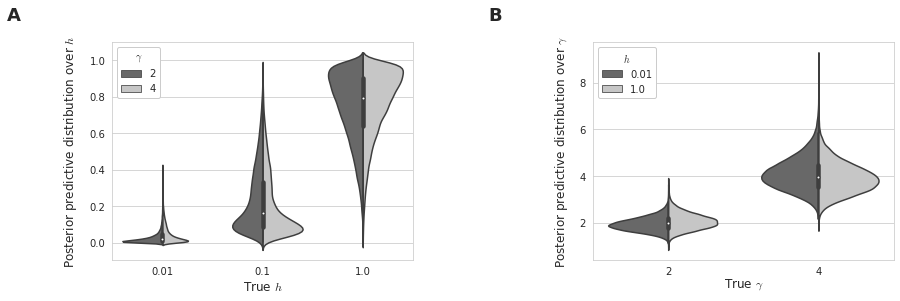

In [19]:

sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.violinplot(ax=axes[0], data=df.query('task == 0'), x = 'h', y = 'h_samples',hue='dec_temp',split=True, palette='Greys_r')
sns.violinplot(ax=axes[1], data=df.query('task == 0 & h != 0.1'), x = 'dec_temp', y = 'dec_samples',hue='h',split=True, palette='Greys_r')


axes[0].set_ylabel('Posterior predictive distribution over $h$',labelpad=10,fontsize=12)
axes[1].set_ylabel('Posterior predictive distribution over $\gamma$',labelpad=10, fontsize=12)
axes[0].set_xlabel('True $h$',fontsize=12)
axes[1].set_xlabel('True $\gamma$',labelpad=0,fontsize=12)

legend = axes[0].legend(loc="upper left",title='$\gamma$', facecolor='white', framealpha=1)
# plt.setp(legend.get_title(),fontsize='x-large')

legend = axes[1].legend(loc="upper left",title='$h$', facecolor='white', framealpha=1)
# plt.setp(legend.get_title(),fontsize='x-large')

plt.subplots_adjust(wspace=0.6)


for n, ax in enumerate(axes):
    ax.text(-0.35,1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=18, weight='bold')

fig.savefig('hvsp_fits.png',bbox_inch = 'tight', dpi=300)


/tmp/ipykernel_251641/2860771287.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('hvsh_fits.png',bbox_inch = 'tight', dpi=300)


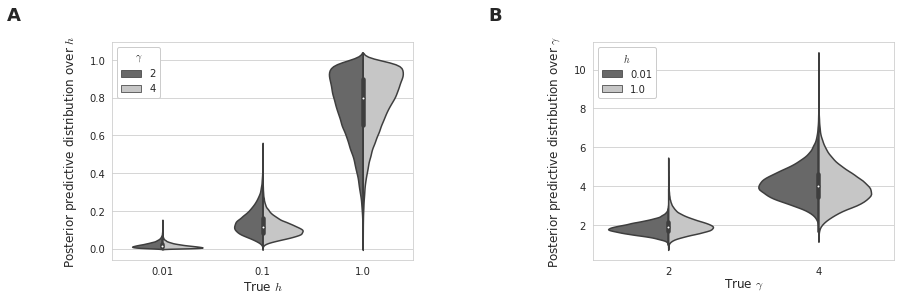

In [31]:

sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.violinplot(ax=axes[0], data=df.query('task == 1'), x = 'h', y = 'h_samples',hue='dec_temp',split=True, palette='Greys_r')
sns.violinplot(ax=axes[1], data=df.query('task == 1 & h != 0.1'), x = 'dec_temp', y = 'dec_samples',hue='h',split=True, palette='Greys_r')


axes[0].set_ylabel('Posterior predictive distribution over $h$',labelpad=10,fontsize=12)
axes[1].set_ylabel('Posterior predictive distribution over $\gamma$',labelpad=10,fontsize=12)
axes[0].set_xlabel('True $h$', fontsize=12)
axes[1].set_xlabel('True $\gamma$',labelpad=0, fontsize=12)

legend = axes[0].legend(loc="upper left",title='$\gamma$', facecolor='white', framealpha=1)
# plt.setp(legend.get_title(),fontsize='x-large')

legend = axes[1].legend(loc="upper left",title='$h$', facecolor='white', framealpha=1)
# plt.setp(legend.get_title(),fontsize='x-large')

plt.subplots_adjust(wspace=0.6)

for n, ax in enumerate(axes):
    ax.text(-0.35,1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=18, weight='bold')
fig.savefig('hvsh_fits.png',bbox_inch = 'tight', dpi=300)
            

In [21]:
means_df = df.query('ns == 0')
means_df.describe()

# fig,axes = plt.subplots(3,2)
# hs = np.log10([1,0.1,0.001])
# decs = [2,4]

# for dec in decs:
#     main_slice = df.query('dec_temp == ' + str(dec))
#     for h in hs:
#         slice = main_slice.query('h == ' + str(h))
#         means = np.unique(slice['h_mean'])
#         print(h,dec, means)

,h,dec_temp,task,h_samples,dec_samples,h_mean,dec_mean,ns
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,0.377297,3.009009,0.504505,0.305373,3.112292,0.325450,3.031290,0.0
std,0.452795,1.004494,0.502247,0.326975,1.255563,0.329952,1.099768,0.0
min,0.010000,2.000000,0.000000,0.000575,1.216368,0.005208,1.637989,0.0
25%,0.010000,2.000000,0.000000,0.034427,1.966913,0.029342,1.971694,0.0
50%,0.100000,4.000000,1.000000,0.139790,2.887074,0.126817,3.330652,0.0
75%,1.000000,4.000000,1.000000,0.526295,4.117803,0.719165,4.055915,0.0
max,1.000000,4.000000,1.000000,0.994633,6.328555,0.882483,4.915372,0.0


In [22]:
p = np.array([0.2, 0.2,0.6])

beta = 0.5


np.exp(p**beta) / np.exp(p**beta).sum()

array([0.29521752, 0.29521752, 0.40956496])

In [23]:
import jsonpickle as pickle
import jsonpickle.ext.numpy as jsonpickle_numpy


fname = 'temp/shuffled/multiple_hier_switch0_degr1_p0.8_learn_rew1_q0.85_h1_70_46_dec1_rew0_u1-9-90_shuffled_extinguish.json'
fname = os.path.join(os.getcwd(),fname)
jsonpickle_numpy.register_handlers()
with open(fname, 'r') as infile:
    data = json.load(infile)
world = pickle.decode(data)[0]


In [24]:
world.agent.__dict__.keys()

outcome_suprise = world.agent.outcome_suprise
policy_entropy = world.agent.policy_entropy
policy_surprise = world.agent.policy_surprise
context_obs_suprise= world.agent.context_obs_suprise
prior_context = world.agent.prior_context
posterior_context = world.agent.posterior_context

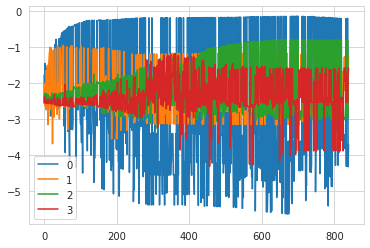

In [25]:
plt.figure()
plt.plot(np.arange(840), policy_surprise[:,-1,0], label='0')
plt.plot(np.arange(840), policy_surprise[:,-1,1], label='1')
plt.plot(np.arange(840), policy_surprise[:,-1,2], label='2')
plt.plot(np.arange(840), policy_surprise[:,-1,3], label='3')
plt.legend()

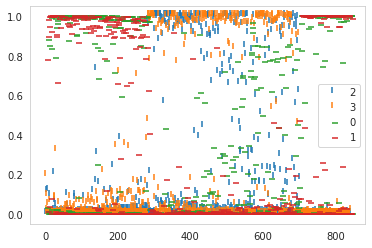

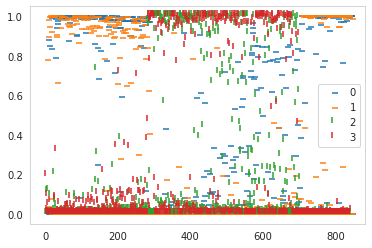

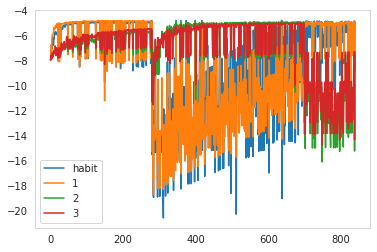

In [26]:
start = 0
finish = 840
plt.figure()
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,2], label='2', marker=2)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,3], label='3', marker=2)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,0], label='0', marker=1)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,1], label='1', marker=1)
plt.grid()
plt.legend()


plt.figure()
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,0], label='0', marker=1)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,1], label='1', marker=1)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,2], label='2', marker=2)
plt.scatter(np.arange(start, finish), posterior_context[start:finish,-1,3], label='3', marker=2)
plt.grid()
plt.legend()


plt.figure()
plt.plot(np.arange(840), outcome_suprise[:,-1,0], label='habit')
plt.plot(np.arange(840), outcome_suprise[:,-1,1], label='1')
plt.plot(np.arange(840), outcome_suprise[:,-1,2], label='2')
plt.plot(np.arange(840), outcome_suprise[:,-1,3], label='3')
plt.grid()
plt.legend()

In [27]:
rewards = world.agent.rewards.sum(axis=1)

training = (rewards[:280].sum())/280
degradation = (rewards[280:-140].sum())/(6*70)
extinction = (rewards[-140:].sum())/140

In [28]:
training

1.1285714285714286

In [29]:
degradation

0.5952380952380952

In [30]:
extinction

0.7928571428571428